<a href="https://colab.research.google.com/github/sh939940/mpg-analysis-ridge-lasso.ipynb/blob/main/mpg_analysis_ridge_lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import linear regression machinelearning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score


In [ ]:
mpg_df = pd.read_csv("/content/sample_data/auto-mpg.csv")
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
mpg_df[mpg_df['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
 # mark missing values
mpg_df = mpg_df.replace('?',np.nan)

In [ ]:
#Fill missing values with a placeholder (0)
mpg_df.fillna(0,inplace=True)

In [ ]:
# Separate the features from the target

x=mpg_df.drop(['mpg','car name'],axis=1)
y = mpg_df[['mpg']]

In [ ]:
x.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

<ipython-input-33-71165463>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[i]) #  Plotting the Distribution of the Column
<ipython-input-33-71165463>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[i]) #  Plotting the Distribution of the Column
<ipython-input-33-71165463>:4: UserWarning: 

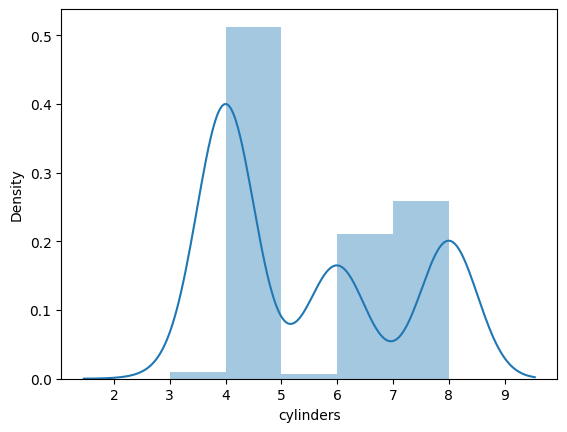

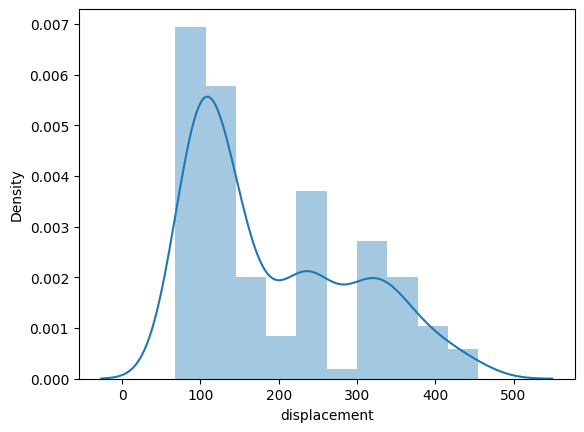

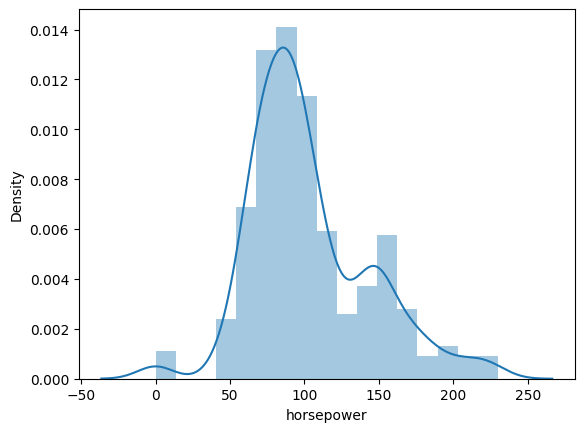

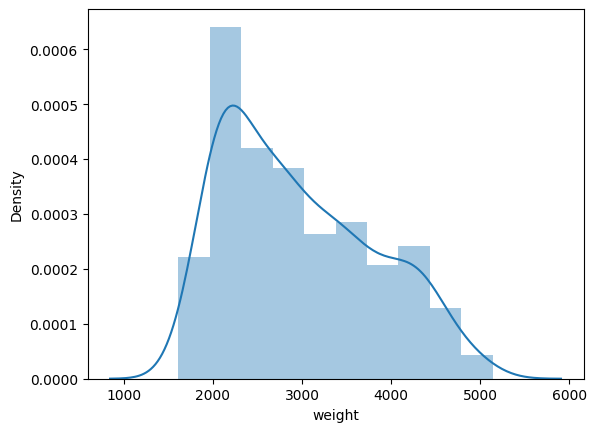

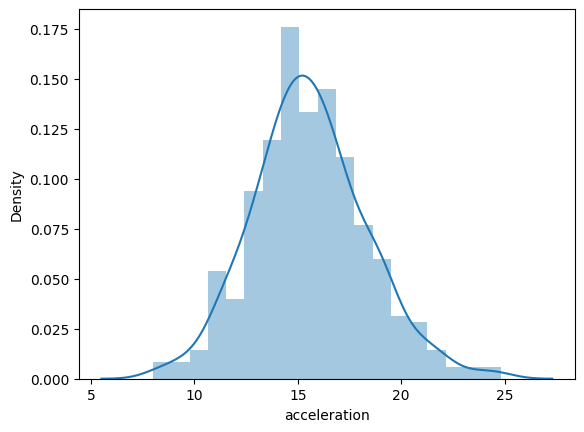

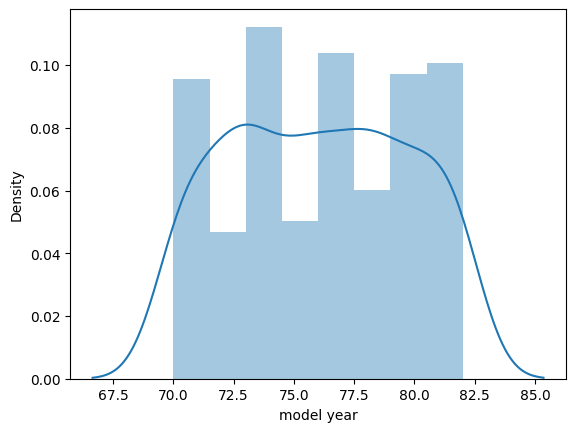

In [ ]:
a=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','model year']
for i in a:
  plt.figure()
  sns.distplot(x[i]) #  Plotting the Distribution of the Column

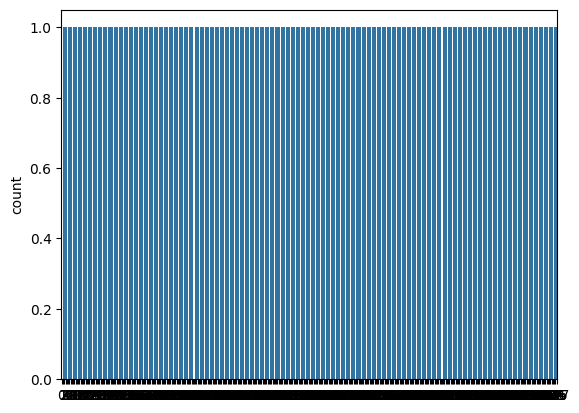

In [ ]:
#  visualize the distribution (frequency) of categorical values
a = ['origin']
for i in a:
  plt.figure()
  sns.countplot(x[i])

<ipython-input-35-683869929>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y['mpg'])


<Axes: xlabel='mpg', ylabel='Density'>

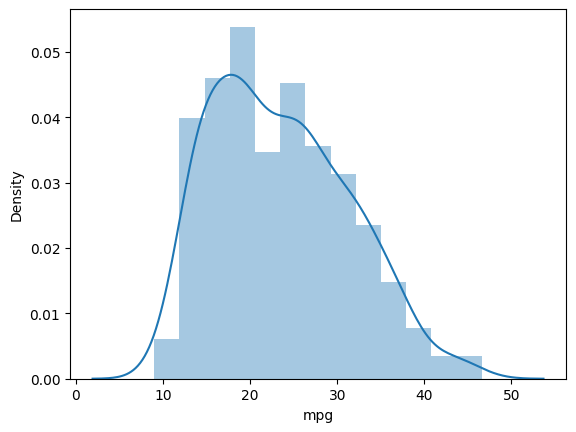

In [ ]:
sns.distplot(y['mpg'])

In [ ]:
from sklearn import preprocessing

x_scaled = preprocessing.scale(x) # Standardize the feature matrix x
x_scaled = pd.DataFrame(x_scaled, columns=x.columns) # Convert the scaled array back to DataFrame for easier handling


y_scaled = preprocessing.scale(y) # Standardize the target variable y
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)


In [ ]:
# Split the scaled data into training and testing sets
from  sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x_scaled, y_scaled ,test_size=0.30,random_state=1)

In [ ]:
regression_model = LinearRegression() # Create the Model
regression_model.fit(x_train,y_train) # Train the Model
for idx , col_name in enumerate(x_train.columns):# Loop Through the Coefficients
  print(f"The coefficient for {col_name} is {regression_model.coef_[0][idx]}")

The coefficient for cylinders is -0.08541454152062913
The coefficient for displacement is 0.2955717212941354
The coefficient for horsepower is -0.05237669744503126
The coefficient for weight is -0.7886192000153426
The coefficient for acceleration is 0.035742088532151
The coefficient for model year is 0.3776971652947721
The coefficient for origin is 0.12148594194925252


In [ ]:
# The intercept (also known as bias) is the predicted value of y when all input features are 0
intercept = regression_model.intercept_[0]

# Print the intercept value of the trained regression model
print(f"The intercept for our model is {intercept}")

The intercept for our model is 0.012514133730796568


In [ ]:
ridge = Ridge(alpha=0.3)  # Create a Ridge model with regularization strength 0.3
ridge.fit(x_train,y_train) # Train the model on your data
for i , col in enumerate(x_train.columns): #Loop through the column names with index
  print(f"Ridge model coefficient for {col} is {ridge.coef_[i]}")

Ridge model coefficient for cylinders is -0.08061795091505619
Ridge model coefficient for displacement is 0.2792271186605383
Ridge model coefficient for horsepower is -0.054515434310512756
Ridge model coefficient for weight is -0.7769769879885586
Ridge model coefficient for acceleration is 0.033421731006119636
Ridge model coefficient for model year is 0.3765606370594483
Ridge model coefficient for origin is 0.1206434180906045


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
for i,col in enumerate(x_train.columns):
  print(f"Lasso model coefficient for {col} is {lasso.coef_[i]}")

Lasso model coefficient for cylinders is -0.0
Lasso model coefficient for displacement is -0.0
Lasso model coefficient for horsepower is -0.0
Lasso model coefficient for weight is -0.6320980422676138
Lasso model coefficient for acceleration is 0.0
Lasso model coefficient for model year is 0.2937750165547303
Lasso model coefficient for origin is 0.020256889705595926


In [ ]:
# Evaluate the model on the training data
# This returns the R² score, which indicates how well the model explains the variance in y_train
print(regression_model.score(x_train,y_train))
# Evaluate the model on the testing data
# This R² score tells us how well the model generalizes to unseen data (X_test, y_test)
print(regression_model.score(x_test,y_test))

0.807587166903863
0.8493630795060818


In [ ]:
print(ridge.score(x_train,y_train))
print(ridge.score(x_test,y_test))

0.8075717962500771
0.8498315025760487


In [ ]:
print(lasso.score(x_train,y_train))
print(lasso.score(x_test,y_test))

0.7851001092842077
0.8274134578768462


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2 , interaction_only=True)
x_poly = poly.fit_transform(x_scaled)
x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=0.3,random_state=1)
x_train.shape

regression_model.fit(x_train, y_train)
print(regression_model.coef_[0])

[-4.42164026e-13  5.80545644e-01  2.94682028e-01 -1.64062686e+00
 -5.36615721e+00 -2.73122510e-01  2.81882878e+00  1.42652113e+00
  5.50481255e-02 -2.76135862e+00  2.36792984e+00  8.42945429e-01
 -1.44026514e+00  1.27320182e+00  4.09562869e-01  4.73492133e-01
 -9.90025496e-01  2.93533840e+00  1.51208503e+00  6.83063953e-01
 -7.46605414e-01 -7.91094961e-01 -1.16648744e+00  5.82510513e-01
 -9.61407112e-01  2.30262400e-01  5.96608548e-01  9.96591065e-01
  6.84046216e-01]


'from sklearn.preprocessing import PolynomialFeatures\npoly = PolynomialFeatures(degree = 2, interaction_only=True)\nx_poly = poly.fit_transform(x_scaled)\nx_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.30, random_state=1)\nx_train.shape\n\n\nregression_model.fit(x_train, y_train)\nprint(regression_model.coef_[0])'

In [ ]:
rifge=Ridge(alpha=0.3)
ridge.fit(x_train,y_train)
print("Ridge model:",(ridge.coef_))

Ridge model: [ 0.          0.59124173  0.08397137 -1.62950518 -5.25694384 -0.27144977
  2.81553696  1.32088222  0.03077832 -2.44179841  2.11001829  0.89058356
 -1.31349841  1.22129262  0.20009008  0.68148288 -0.95800347  2.69724501
  1.38044808  0.65423992 -0.74359649 -0.73881753 -1.203582    0.52597233
 -0.9067953   0.30177223  0.59588217  0.98474899  0.66680577]


In [ ]:
print(ridge.score(x_train,y_train))
print(ridge.score(x_test,y_test))

0.888317784748953
0.8705386328263932


In [ ]:
lasso=Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
print("lass0 model",(lasso.coef_))

lass0 model [ 0.          0.32695862 -0.         -1.27835758 -5.3717493  -0.08426658
  2.82735072  0.98085696  0.         -1.69199029  1.59951572  0.61293842
 -0.75888542  0.95779963  0.          0.90610212 -0.25814866  1.69809913
  1.17363452  0.5667921  -0.64107249 -0.56439279 -0.85489185  0.19396297
 -0.67035879  0.09614287  0.61185969  1.07195924  0.62604745]


In [ ]:
print(lasso.score(x_train,y_train))
print(lasso.score(x_test,y_test))

0.8870913003631874
0.8735229733173657
